<a href="https://colab.research.google.com/github/calarconf/computacion-visual/blob/main/Taller1ComputacionVisual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-8-71da004930db>:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  triangulo = Polygon(vertices,


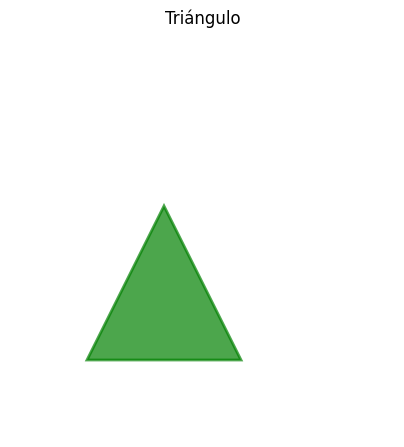

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Crear figura y eje
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_aspect('equal')
ax.axis('off')  # Ocultar ejes

# Definir los vértices del triángulo (x, y)
vertices = [(1, 1), (3, 1), (2, 3)]

# Crear y añadir el triángulo
triangulo = Polygon(vertices,
                   fill=True,
                   color='green',
                   alpha=0.7,
                   edgecolor='darkgreen',
                   linewidth=2)
ax.add_patch(triangulo)

# Añadir título
ax.set_title('Triángulo', pad=20, fontsize=12)

# Mostrar el triángulo
plt.show()

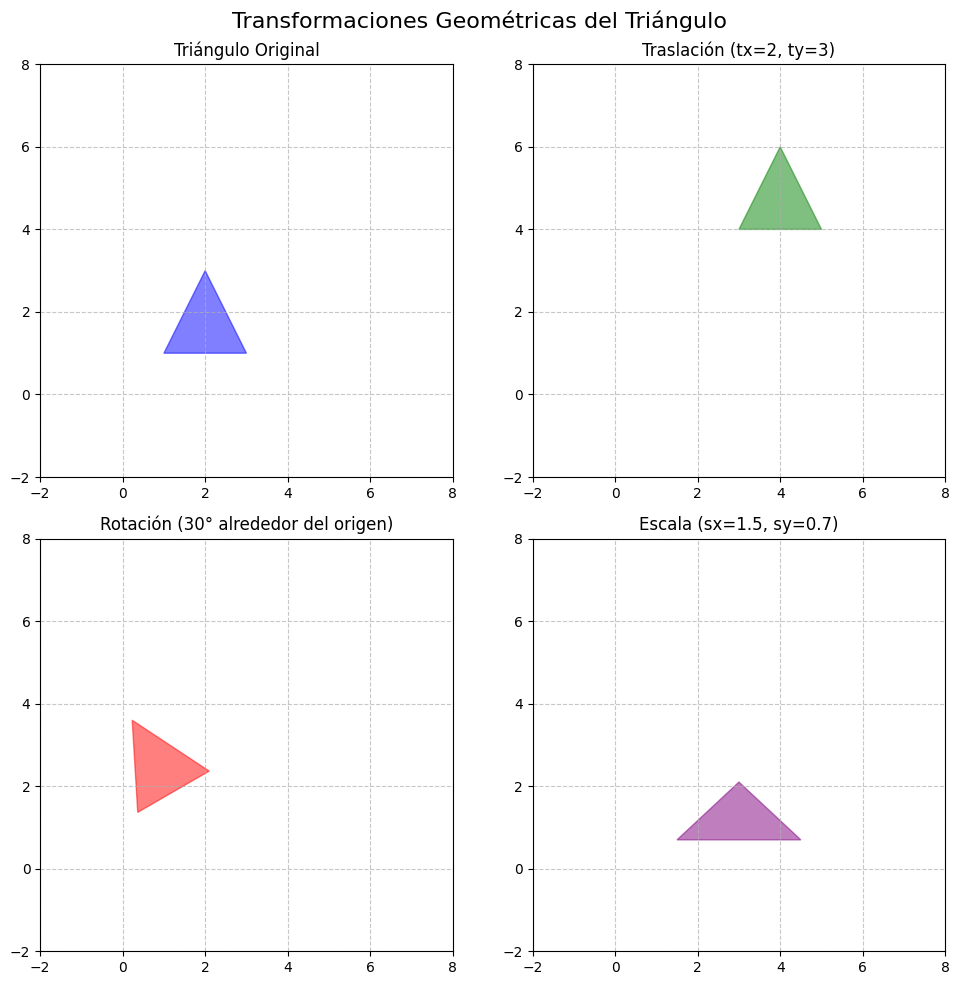

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# 1. Definir el triángulo original (vértices como filas en coordenadas homogéneas)
vertices = np.array([[1, 1, 1],  # Vértice A
                     [3, 1, 1],  # Vértice B
                     [2, 3, 1]]) # Vértice C

# 2. Crear figura
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Transformaciones Geométricas del Triángulo', fontsize=16)

# Configurar subplots
for a in ax.flat:
    a.set_xlim(-2, 8)
    a.set_ylim(-2, 8)
    a.set_aspect('equal')
    a.grid(True, linestyle='--', alpha=0.7)

# 3. Dibujar triángulo original
ax[0, 0].set_title('Triángulo Original')
triangulo_original = Polygon(vertices[:, :2], fill=True, color='blue', alpha=0.5)
ax[0, 0].add_patch(triangulo_original)

# --- Transformaciones ---

# a) Matriz de Traslación (tx=2, ty=3)
def matriz_traslacion(tx, ty):
    return np.array([[1, 0, tx],
                     [0, 1, ty],
                     [0, 0, 1]])

T = matriz_traslacion(2, 3)
vertices_trasladados = (T @ vertices.T).T

ax[0, 1].set_title('Traslación (tx=2, ty=3)')
triangulo_trasladado = Polygon(vertices_trasladados[:, :2], fill=True, color='green', alpha=0.5)
ax[0, 1].add_patch(triangulo_trasladado)

# b) Matriz de Rotación (30 grados alrededor del origen)
def matriz_rotacion(theta):
    rad = np.radians(theta)
    return np.array([[np.cos(rad), -np.sin(rad), 0],
                     [np.sin(rad), np.cos(rad), 0],
                     [0, 0, 1]])

R = matriz_rotacion(30)
vertices_rotados = (R @ vertices.T).T

ax[1, 0].set_title('Rotación (30° alrededor del origen)')
triangulo_rotado = Polygon(vertices_rotados[:, :2], fill=True, color='red', alpha=0.5)
ax[1, 0].add_patch(triangulo_rotado)

# c) Matriz de Escala (sx=1.5, sy=0.7)
def matriz_escala(sx, sy):
    return np.array([[sx, 0, 0],
                     [0, sy, 0],
                     [0, 0, 1]])

S = matriz_escala(1.5, 0.7)
vertices_escalados = (S @ vertices.T).T

ax[1, 1].set_title('Escala (sx=1.5, sy=0.7)')
triangulo_escalado = Polygon(vertices_escalados[:, :2], fill=True, color='purple', alpha=0.5)
ax[1, 1].add_patch(triangulo_escalado)

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import imageio
from math import radians, sin, cos

# Configuración de la animación
n_frames = 60
duration = 0.05
gif_path = 'triangulo_transformaciones.gif'

# Coordenadas iniciales del triángulo
vertices = np.array([[1, 1, 1],
                     [3, 1, 1],
                     [2, 3, 1]])

# Parámetros de transformación
tx_final, ty_final = 4, 3
angulo_final = 360
sx_final, sy_final = 2.0, 1.5

# Lista para almacenar los frames
frames = []

# Crear figura
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-3, 8)
ax.set_ylim(-3, 8)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.5)

def aplicar_transformacion(frame):
    ax.clear()
    ax.set_xlim(-3, 8)
    ax.set_ylim(-3, 8)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title('Animación de Transformaciones del Triángulo')

    t = frame / n_frames

    # Matrices de transformación
    tx = t * tx_final
    ty = t * ty_final
    T = np.array([[1, 0, tx],
                  [0, 1, ty],
                  [0, 0, 1]])

    cx, cy = 2, 1.67
    angle = t * angulo_final
    rad = radians(angle)

    T1 = np.array([[1, 0, -cx],
                   [0, 1, -cy],
                   [0, 0, 1]])
    R = np.array([[cos(rad), -sin(rad), 0],
                  [sin(rad), cos(rad), 0],
                  [0, 0, 1]])
    T2 = np.array([[1, 0, cx],
                   [0, 1, cy],
                   [0, 0, 1]])
    rotacion = T2 @ R @ T1

    sx = 1 + t * (sx_final - 1)
    sy = 1 + t * (sy_final - 1)
    S = np.array([[sx, 0, 0],
                  [0, sy, 0],
                  [0, 0, 1]])

    M = T @ rotacion @ S
    vertices_transformados = (M @ vertices.T).T

    triangulo = Polygon(vertices_transformados[:, :2],
                       fill=True, color='blue', alpha=0.7)
    ax.add_patch(triangulo)

    triangulo_original = Polygon(vertices[:, :2],
                               fill=True, color='red', alpha=0.2)
    ax.add_patch(triangulo_original)

    ax.text(-2, 7.5, f"Frame: {frame}/{n_frames}", fontsize=10)
    ax.text(-2, 7, f"Traslación: ({tx:.1f}, {ty:.1f})", fontsize=10)
    ax.text(-2, 6.5, f"Rotación: {angle:.1f}°", fontsize=10)
    ax.text(-2, 6, f"Escala: ({sx:.1f}, {sy:.1f})", fontsize=10)

    # Convertir figura a imagen (forma compatible con versiones recientes)
    fig.canvas.draw()
    image = np.array(fig.canvas.renderer.buffer_rgba())
    frames.append(image[:, :, :3])  # Eliminar canal alpha para imageio

# Generar frames
for frame in range(n_frames + 1):
    aplicar_transformacion(frame)

# Guardar GIF
imageio.mimsave(gif_path, frames, duration=duration, fps=15)

plt.close()
print(f"GIF creado exitosamente: {gif_path}")

GIF creado exitosamente: triangulo_transformaciones.gif


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import imageio
from math import radians, sin, cos

# Configuración de la animación
n_frames = 120  # Más frames para animación más suave
duration = 0.05  # Duración de cada frame en segundos
gif_path = 'triangulo_animado.gif'

# Coordenadas iniciales del triángulo (en coordenadas homogéneas)
vertices = np.array([[1, 1, 1],  # Vértice A
                     [3, 1, 1],  # Vértice B
                     [2, 3, 1]]) # Vértice C

# Parámetros de transformación
tx_final, ty_final = 5, 4  # Traslación final
angulo_final = 720  # Rotación final en grados (2 vueltas)
sx_final, sy_final = 2.5, 1.8  # Escala final

# Función de interpolación suave (ease-in-out)
def smoothstep(t):
    return t * t * (3 - 2 * t)

# Lista para almacenar los frames
frames = []

# Crear figura
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-4, 10)
ax.set_ylim(-4, 10)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_title('Animación de Transformaciones del Triángulo')

def aplicar_transformacion(t):
    ax.clear()
    ax.set_xlim(-4, 10)
    ax.set_ylim(-4, 10)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(f'Transformaciones del Triángulo (t = {t:.2f})')

    # Aplicar función de interpolación suave
    t_smooth = smoothstep(t)

    # 1. Traslación (movimiento sinusoidal)
    tx = tx_final * np.sin(t_smooth * np.pi/2)
    ty = ty_final * t_smooth

    # 2. Rotación (aceleración gradual)
    angle = angulo_final * t_smooth

    # 3. Escala (crecimiento no lineal)
    sx = 1 + (sx_final - 1) * t_smooth**2
    sy = 1 + (sy_final - 1) * t_smooth**2

    # Matrices de transformación
    # Traslación
    T = np.array([[1, 0, tx],
                  [0, 1, ty],
                  [0, 0, 1]])

    # Rotación alrededor del centro del triángulo
    cx, cy = 2, 1.67  # Centro aproximado
    rad = radians(angle)
    T1 = np.array([[1, 0, -cx],
                   [0, 1, -cy],
                   [0, 0, 1]])
    R = np.array([[cos(rad), -sin(rad), 0],
                  [sin(rad), cos(rad), 0],
                  [0, 0, 1]])
    T2 = np.array([[1, 0, cx],
                   [0, 1, cy],
                   [0, 0, 1]])
    rotacion = T2 @ R @ T1

    # Escala
    S = np.array([[sx, 0, 0],
                  [0, sy, 0],
                  [0, 0, 1]])

    # Transformación compuesta
    M = T @ rotacion @ S
    vertices_transformados = (M @ vertices.T).T

    # Dibujar triángulo transformado
    color = plt.cm.viridis(t)  # Color que cambia con el tiempo
    triangulo = Polygon(vertices_transformados[:, :2],
                       fill=True, color=color, alpha=0.8,
                       edgecolor='black', linewidth=1)
    ax.add_patch(triangulo)

    # Dibujar triángulo original como referencia
    triangulo_original = Polygon(vertices[:, :2],
                               fill=True, color='gray', alpha=0.2,
                               edgecolor='black', linestyle='--')
    ax.add_patch(triangulo_original)

    # Información de transformación
    ax.text(-3, 9, f"Tiempo: {t:.2f}", fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
    ax.text(-3, 8.5, f"Traslación: ({tx:.2f}, {ty:.2f})", fontsize=9)
    ax.text(-3, 8, f"Rotación: {angle:.1f}°", fontsize=9)
    ax.text(-3, 7.5, f"Escala: ({sx:.2f}, {sy:.2f})", fontsize=9)

    # Convertir a imagen y añadir al GIF
    fig.canvas.draw()
    image = np.array(fig.canvas.renderer.buffer_rgba())
    return image[:, :, :3]  # Eliminar canal alpha

# Generar frames con progresión no lineal
for frame in range(n_frames + 1):
    t = frame / n_frames
    frames.append(aplicar_transformacion(t))

    # Mostrar progreso
    if frame % 20 == 0:
        print(f"Generando frame {frame}/{n_frames}...")

# Guardar GIF con optimización
print("Guardando GIF...")
imageio.mimsave(gif_path, frames, duration=duration, fps=24, loop=0)

plt.close()
print(f"GIF animado guardado como: {gif_path}")

<ipython-input-12-0087745d8db8>:89: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  triangulo = Polygon(vertices_transformados[:, :2],
<ipython-input-12-0087745d8db8>:95: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  triangulo_original = Polygon(vertices[:, :2],


Generando frame 0/120...
Generando frame 20/120...
Generando frame 40/120...
Generando frame 60/120...
Generando frame 80/120...
Generando frame 100/120...
Generando frame 120/120...
Guardando GIF...
GIF animado guardado como: triangulo_animado.gif
